<a href="https://colab.research.google.com/github/nicoeiris11/gradient-descent/blob/master/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Planteo

En esta práctica vamos a ver en detalle como funciona SGD. Comenzamos con modelos lineales simples para resolver un problema de ejemplo con el objetivo de entender como funcionan los algoritmos sobre los que después vamos a construir redes complejas. 

El problema puntual es el siguiente:

Tenemos varias mediciones de temperatura en grados celsius y la misma cantidad de mediciones en una unidad desconocida (tomadas por un termómetro que no indica la unidad). Queremos ver si podemos encontrar una función que transforme de esta unidad desconocida a grados celsius.

***

Las medidas tomadas son las siguientes:

Grados celsius: [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]

Equivalente en unidad desconocida: [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]


In [ ]:
import torch
import numpy as np

inputs = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])  # Datos observados
targets = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])     # Equivalente en celsius

inputs = inputs / 10  # Normalizamos los datos para facilitar entrenamiento.

Definimos un modelo lineal (regresion) como una función, la misma recibe el input (X), los pesos (W) y los bias (b). 

Al ser una regresión lineal, el modelo simplemente computa el producto de cada peso por el input y le suma el bias (No es una red, no tiene activacion!)


In [ ]:
def model(X, w, b):
  return X * w + b

In [ ]:
# Como usamos el modelo

w_test = torch.ones(())
b_test = torch.zeros(())

prediccion = model(inputs, w_test, b_test)
prediccion

tensor([3.5700, 5.5900, 5.8200, 8.1900, 5.6300, 4.8900, 3.3900, 2.1800, 4.8400,
        6.0400, 6.8400])

Vamos a usar MSE (Mean Squared Error - Error Cuadrático Medio) como función de costo

In [ ]:
def loss_fn(predictions, true_y):
  return torch.mean((true_y - predictions) ** 2)

loss_fn(prediccion, targets)

tensor(80.3643)

# Actualizando

Queremos que el modelo minimize nuestra función de costo, para esto vamos a hacer uso de gradient descent.

GD nos dice que una actualización para nuestros pesos esta dada por:

***

![Image](https://blog.paperspace.com/content/images/2018/05/sgd.png)
***

Donde alfa es un learning rate en el rango (0-1) y es multiplicado por la derivada del costo con respecto a los pesos. En este caso, necesitamos el gradiente con respecto a los pesos W y el bias B.


![Image](https://i.ibb.co/xDW81qF/asd.png)




In [ ]:
# Por la regla de la cadena:
# dloss/dw = (d loss / d targets) * (d targets / d w)
# dloss/db = (d loss / d targets) * (d targets / d b)

def d_loss_d_targets(predictions, targets):
    return 2 * (targets - predictions) / targets.size(0)

def d_model_dw(X, w, b):
    return X

def d_model_db(X, w, b):
    return 1

def grad_fn(X, targets, predictions, w, b):
    dloss_dw = d_loss_d_targets(predictions, targets) * d_model_dw(X, w, b)
    dloss_db = d_loss_d_targets(predictions, targets) * d_model_db(X, w, b)
    return torch.tensor([dloss_dw.sum(), dloss_db.sum()])

In [ ]:
grad_fn(inputs, targets, prediccion, w_test, b_test)

tensor([77.6140, 10.6400])

# Entrenando

Ahora que tenemos los gradientes de los pesos y bias, podemos actualizar los parámetros del modelo para ir mejorando nuestras predicciones


In [ ]:
def training_loop(n_epochs, learning_rate, params, targets, X):
    for epoch in range(1, n_epochs + 1):
        w, b = params
        predictions = model(X, w, b)
        w_step, b_step = grad_fn(X, targets, predictions, w, b)
        w_upd = w + learning_rate * w_step
        b_upd = b + learning_rate * b_step
        params = torch.tensor([w_upd, b_upd])
        
        loss = loss_fn(predictions, targets)
        # Imprimir cada 100 epochs
        if epoch % 100 == 0:
          print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [ ]:
final_params = training_loop(
    n_epochs = 3000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    targets = targets, 
    X = inputs)

final_params

Epoch 100, Loss 22.148710
Epoch 200, Loss 16.608065
Epoch 300, Loss 12.664560
Epoch 400, Loss 9.857801
Epoch 500, Loss 7.860115
Epoch 600, Loss 6.438281
Epoch 700, Loss 5.426306
Epoch 800, Loss 4.706045
Epoch 900, Loss 4.193403
Epoch 1000, Loss 3.828537
Epoch 1100, Loss 3.568847
Epoch 1200, Loss 3.384014
Epoch 1300, Loss 3.252462
Epoch 1400, Loss 3.158830
Epoch 1500, Loss 3.092190
Epoch 1600, Loss 3.044759
Epoch 1700, Loss 3.011000
Epoch 1800, Loss 2.986974
Epoch 1900, Loss 2.969871
Epoch 2000, Loss 2.957698
Epoch 2100, Loss 2.949034
Epoch 2200, Loss 2.942869
Epoch 2300, Loss 2.938481
Epoch 2400, Loss 2.935356
Epoch 2500, Loss 2.933135
Epoch 2600, Loss 2.931553
Epoch 2700, Loss 2.930426
Epoch 2800, Loss 2.929624
Epoch 2900, Loss 2.929054
Epoch 3000, Loss 2.928648


tensor([  5.3489, -17.1980])

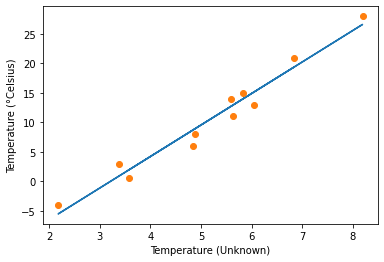

In [ ]:
from matplotlib import pyplot as plt

preds = model(inputs, *final_params)  

plt.xlabel("Temperature (Unknown)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(inputs.numpy(), preds.detach().numpy()) 
plt.plot(inputs.numpy(), targets.numpy(), 'o')
plt.show()

# Como se resuelve el mismo ejercicio cuando dejamos que Pytorch nos ayude?

Resuelva el mismo problema pero haciendo uso de Pytorch en su totalidad, defina w y b como un torch.parameter (requires_grad=True!!!) y haga uso de loss.backward() para computar los gradientes. 

In [ ]:
def training_with_torch(n_epochs, learning_rate, params, targets, X):
    optimizer = torch.optim.SGD([params], lr=learning_rate)
    for epoch in range(1, n_epochs + 1):
        predictions = model(X, *params)
        optimizer.zero_grad()
        loss = loss_fn(predictions, targets)
        loss.backward()
        optimizer.step()

        # Imprimir cada 100 epochs
        if epoch % 100 == 0:
          print('Epoch %d, Loss %f' % (epoch, loss))
            
    return params

In [ ]:
final_params2 = training_with_torch(
    n_epochs = 3000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0], requires_grad=True), 
    targets = targets, 
    X = inputs)

final_params2

Epoch 100, Loss 22.148710
Epoch 200, Loss 16.608065
Epoch 300, Loss 12.664560
Epoch 400, Loss 9.857801
Epoch 500, Loss 7.860115
Epoch 600, Loss 6.438281
Epoch 700, Loss 5.426306
Epoch 800, Loss 4.706045
Epoch 900, Loss 4.193403
Epoch 1000, Loss 3.828537
Epoch 1100, Loss 3.568847
Epoch 1200, Loss 3.384015
Epoch 1300, Loss 3.252462
Epoch 1400, Loss 3.158830
Epoch 1500, Loss 3.092190
Epoch 1600, Loss 3.044759
Epoch 1700, Loss 3.011000
Epoch 1800, Loss 2.986973
Epoch 1900, Loss 2.969869
Epoch 2000, Loss 2.957697
Epoch 2100, Loss 2.949034
Epoch 2200, Loss 2.942869
Epoch 2300, Loss 2.938481
Epoch 2400, Loss 2.935356
Epoch 2500, Loss 2.933135
Epoch 2600, Loss 2.931553
Epoch 2700, Loss 2.930426
Epoch 2800, Loss 2.929624
Epoch 2900, Loss 2.929053
Epoch 3000, Loss 2.928647


tensor([  5.3489, -17.1980], requires_grad=True)

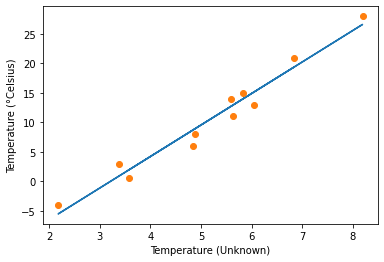

In [ ]:
from matplotlib import pyplot as plt

preds = model(inputs, *final_params2)

plt.xlabel("Temperature (Unknown)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(inputs.numpy(), preds.detach().numpy()) 
plt.plot(inputs.numpy(), targets.numpy(), 'o')
plt.show()